In [1]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import files
uploaded = files.upload()


Saving plant_sensor_data.csv to plant_sensor_data.csv


In [13]:
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


In [14]:
df = df.drop(columns=["Timestamp"])


In [15]:
df = df.dropna()    # remove NaN rows

print(df.shape)
df.head()


(1200, 13)


,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


In [16]:
target = "Plant_Health_Status"

X = df.drop(columns=[target])
y = df[target]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.20,
    random_state = 42,
    stratify = y
)


In [18]:
model = CatBoostClassifier(
    iterations = 1200,
    learning_rate = 0.03,
    depth = 6,
    loss_function="MultiClass",
    random_seed = 42
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)


0:	learn: 1.0506041	test: 1.0522081	best: 1.0522081 (0)	total: 58.3ms	remaining: 1m 9s
100:	learn: 0.0897999	test: 0.1030254	best: 0.1030254 (100)	total: 904ms	remaining: 9.84s
200:	learn: 0.0257255	test: 0.0347055	best: 0.0347055 (200)	total: 1.78s	remaining: 8.84s
300:	learn: 0.0098866	test: 0.0180757	best: 0.0180757 (300)	total: 2.61s	remaining: 7.8s
400:	learn: 0.0055862	test: 0.0145215	best: 0.0145215 (400)	total: 3.45s	remaining: 6.87s
500:	learn: 0.0039007	test: 0.0135562	best: 0.0135562 (500)	total: 4.75s	remaining: 6.63s
600:	learn: 0.0031126	test: 0.0134830	best: 0.0134454 (533)	total: 6.38s	remaining: 6.36s
700:	learn: 0.0025478	test: 0.0134258	best: 0.0133602 (638)	total: 7.37s	remaining: 5.24s
800:	learn: 0.0021763	test: 0.0135759	best: 0.0133602 (638)	total: 8.21s	remaining: 4.09s
900:	learn: 0.0019133	test: 0.0137426	best: 0.0133602 (638)	total: 9.05s	remaining: 3s
1000:	learn: 0.0016962	test: 0.0138464	best: 0.0133602 (638)	total: 9.92s	remaining: 1.97s
1100:	learn: 0.0

In [19]:
preds = model.predict(X_test)

print("\nAccuracy:\n", accuracy_score(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))



Accuracy:
 0.9958333333333333

Classification Report:
                  precision    recall  f1-score   support

        Healthy       1.00      1.00      1.00        60
    High Stress       1.00      0.99      0.99       100
Moderate Stress       0.99      1.00      0.99        80

       accuracy                           1.00       240
      macro avg       1.00      1.00      1.00       240
   weighted avg       1.00      1.00      1.00       240



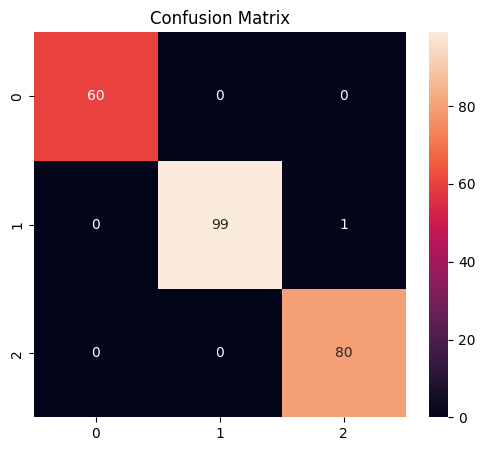

In [20]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [21]:
fi = model.get_feature_importance()
cols = X.columns

for c,v in sorted(zip(cols,fi), key=lambda x:x[1], reverse=True):
    print(c," --> ",v)


Soil_Moisture  -->  77.71742500955577
Nitrogen_Level  -->  19.82557663383248
Phosphorus_Level  -->  0.32111520617054085
Soil_pH  -->  0.30602222531886625
Soil_Temperature  -->  0.2841410398232672
Electrochemical_Signal  -->  0.24421366533936067
Ambient_Temperature  -->  0.24384967474264102
Humidity  -->  0.24341661989514063
Chlorophyll_Content  -->  0.22968258115218493
Potassium_Level  -->  0.21494160320606978
Plant_ID  -->  0.19740641106412765
Light_Intensity  -->  0.17220932989953724


In [22]:
scores = cross_val_score(model, X, y, cv=5)
print("CV scores:", scores)
print("Mean CV:", scores.mean())


Streaming output truncated to the last 5000 lines.
1002:	learn: 0.0034878	total: 13.4s	remaining: 2.63s
1003:	learn: 0.0034750	total: 13.4s	remaining: 2.62s
1004:	learn: 0.0034729	total: 13.4s	remaining: 2.6s
1005:	learn: 0.0034716	total: 13.4s	remaining: 2.59s
1006:	learn: 0.0034688	total: 13.4s	remaining: 2.57s
1007:	learn: 0.0034674	total: 13.4s	remaining: 2.56s
1008:	learn: 0.0034613	total: 13.4s	remaining: 2.54s
1009:	learn: 0.0034598	total: 13.5s	remaining: 2.53s
1010:	learn: 0.0034540	total: 13.5s	remaining: 2.52s
1011:	learn: 0.0034481	total: 13.5s	remaining: 2.5s
1012:	learn: 0.0034473	total: 13.5s	remaining: 2.49s
1013:	learn: 0.0034457	total: 13.5s	remaining: 2.47s
1014:	learn: 0.0034437	total: 13.5s	remaining: 2.46s
1015:	learn: 0.0034328	total: 13.5s	remaining: 2.44s
1016:	learn: 0.0034310	total: 13.5s	remaining: 2.43s
1017:	learn: 0.0034241	total: 13.5s	remaining: 2.42s
1018:	learn: 0.0034121	total: 13.5s	remaining: 2.4s
1019:	learn: 0.0034058	total: 13.5s	remaining: 2.39

In [23]:
model.save_model("plant_health_model.cbm")


In [24]:
files.download("plant_health_model.cbm")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>